# Hénon–Heiles — Visualização 3D da variedade \(H=E\) (projeção em \((q_1,q_2,p_2)\))

Este caderno desenha, para uma energia fixa \(E\), a **projeção** da variedade \(H=E\) do sistema de Hénon–Heiles no espaço \((q_1,q_2,p_2)\).

Hamiltoniana (adimensional):
\[
H(q_1,q_2,p_1,p_2) = \tfrac{1}{2}(p_1^2+p_2^2+q_1^2+q_2^2) + q_1^2 q_2 - \tfrac{1}{3} q_2^3.
\]

Fixando \(H=E\), obtemos (eliminando \(p_1\)):
\[
p_1^2 = F(q_1,q_2,p_2;E) \equiv 2E - (q_1^2+q_2^2+p_2^2) - 2q_1^2 q_2 + \tfrac{2}{3}q_2^3.
\]

- **Região permitida:** \(F \ge 0\) (existe \(p_1 = \pm\sqrt{F}\)).  
- **Fronteira:** \(F = 0\) (equivale a \(p_1 = 0\)).

> Importante: estamos vendo uma **projeção 3D de um objeto 3D embutido em 4D**. Não é, em geral, um toroide perfeito. As curvas “tipo toro” aparecem quando olhamos **seções de Poincaré**, que são interseções da variedade com um plano e se organizam em toros/quase-toros no mapa 2D.


## Definindo a hamiltoniana

### 1. Hamiltoniana de Hénon–Heiles
$$
H = \tfrac{1}{2}\left(p_1^2 + p_2^2 + q_1^2 + q_2^2\right) \;+\; q_1^2 q_2 \;-\; \tfrac{1}{3} q_2^3
$$

---

### 2. Vamos impor energia fixa,
Queremos estudar a superfície de energia:
$$
H(q_1,q_2,p_1,p_2) = E
$$

---

### 3. Isolar $p_1^2$
Rearranjando a equação da Hamiltoniana para explicitar $p_1^2$:
$$
p_1^2 = 2E - \big(q_1^2 + q_2^2 + p_2^2\big) - 2q_1^2 q_2 + \tfrac{2}{3} q_2^3
$$

Essa expressão do lado direito é exatamente o que a função `F_q1q2p2(q1,q2,p2,E)` calcula.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def F_q1q2p2(q1, q2, p2, E):
    """F(q1,q2,p2;E) = p1^2."""
    return 2*E - (q1*q1 + q2*q2 + p2*p2) - 2.0*q1*q1*q2 + (2.0/3.0)*q2*q2*q2

## 1) Imports e funções auxiliares

In [ ]:


def sample_boundary_and_volume(E=0.08333, q1_range=(-0.9,0.9), q2_range=(-0.6,1.2),
                               p2_range=(-2.6,2.6), N=40, eps=1e-3, vol_frac=0.01, seed=0):
    """Amostra pontos perto da fronteira F≈0 (isosuperfície) e alguns pontos de F>0 (interior).
    - N: resolução da grade cúbica.
    - eps: tolerância |F|<=eps para considerar 'na casca'.
    - vol_frac: fração (0–1) de pontos internos sorteados (para não encher demais).
    """
    rng = np.random.default_rng(seed)
    q1 = np.linspace(*q1_range, N)
    q2 = np.linspace(*q2_range, N)
    p2 = np.linspace(*p2_range, N)
    Q1,Q2,P2 = np.meshgrid(q1,q2,p2, indexing='ij')
    F = F_q1q2p2(Q1,Q2,P2,E)
    # casca: |F| ~ 0
    mask_surf = np.abs(F) <= eps
    Q1s,Q2s,P2s = Q1[mask_surf], Q2[mask_surf], P2[mask_surf]
    # interior: F>0 (pontos esparsos)
    mask_vol = F > 0
    idx = np.argwhere(mask_vol)
    k = int(vol_frac * idx.shape[0])
    if k > 0 and idx.shape[0] > 0:
        pick = idx[rng.choice(idx.shape[0], size=k, replace=False)]
        Q1v = Q1[tuple(pick.T)]; Q2v = Q2[tuple(pick.T)]; P2v = P2[tuple(pick.T)]
    else:
        Q1v=Q2v=P2v=np.array([])
    return (Q1s,Q2s,P2s),(Q1v,Q2v,P2v)


## 2) Funções de plot 3D

In [2]:
def plot_energy_projection(E=0.08333, N=42, eps=2e-3, vol_frac=0.01,
                           q1_range=(-0.9,0.9), q2_range=(-0.6,1.2), p2_range=(-2.6,2.6),
                           show_section_plane=True, elev=24, azim=-62, save=None):
    """Plota a casca F≈0 e pontos do interior F>0.
    - show_section_plane: desenha o plano q1=0 semi-transparente.
    - elev/azim: câmera 3D.
    - save: caminho para salvar PNG (opcional).
    """
    (Q1s,Q2s,P2s),(Q1v,Q2v,P2v) = sample_boundary_and_volume(
        E, q1_range,q2_range,p2_range, N=N, eps=eps, vol_frac=vol_frac, seed=1
    )
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    # isosuperfície aproximada (fronteira F~0)
    ax.scatter(Q1s, Q2s, P2s, s=2, depthshade=False, alpha=0.9)
    # volume esparso (permitido)
    if Q1v.size:
        ax.scatter(Q1v, Q2v, P2v, s=1, alpha=0.05, depthshade=False)
    # plano da seção q1=0
    if show_section_plane:
        yy = np.linspace(*q2_range, 30)
        zz = np.linspace(*p2_range, 30)
        YY, ZZ = np.meshgrid(yy, zz, indexing='ij')
        XX = np.zeros_like(YY)
        ax.plot_surface(XX, YY, ZZ, alpha=0.12, color='gray', linewidth=0, antialiased=False)
    ax.set_xlabel('q1'); ax.set_ylabel('q2'); ax.set_zlabel('p2')
    ax.set_title(f'Proj. 3D da variedade H=E (F≥0) — E={E:.5f}')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlim(*q1_range); ax.set_ylim(*q2_range); ax.set_zlim(*p2_range)
    if save:
        plt.savefig(save, dpi=220, bbox_inches='tight')
    plt.show()

def plot_slice_q1_const(E=0.08333, q1c=0.0, Nq2=400, Np2=400,
                        q2_range=(-0.6,1.2), p2_range=(-2.6,2.6), levels=(0,), save=None):
    """Plota um 'mapa de contorno' F(q1=q1c, q2, p2) no plano (q2,p2).
    level=0 mostra a curva da fronteira (p1=0) nessa fatia.
    Útil para 'ver dentro' via cortes planos.
    """
    q2 = np.linspace(*q2_range, Nq2)
    p2 = np.linspace(*p2_range, Np2)
    Q2,P2 = np.meshgrid(q2,p2, indexing='ij')
    F = F_q1q2p2(q1c, Q2, P2, E)
    plt.figure(figsize=(6.2,5.2))
    cs = plt.contour(Q2, P2, F, levels=levels)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.xlabel('q2'); plt.ylabel('p2')
    plt.title(f'Corte plano q1={q1c:.3f} — Níveis de F (E={E:.5f})')
    if save:
        plt.savefig(save, dpi=220, bbox_inches='tight')
    plt.show()


## 3) Exemplos rápidos

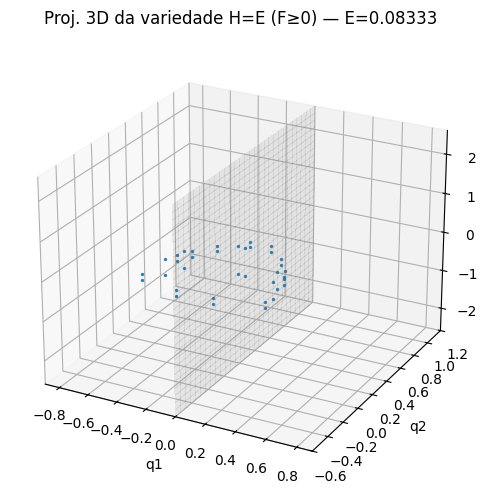

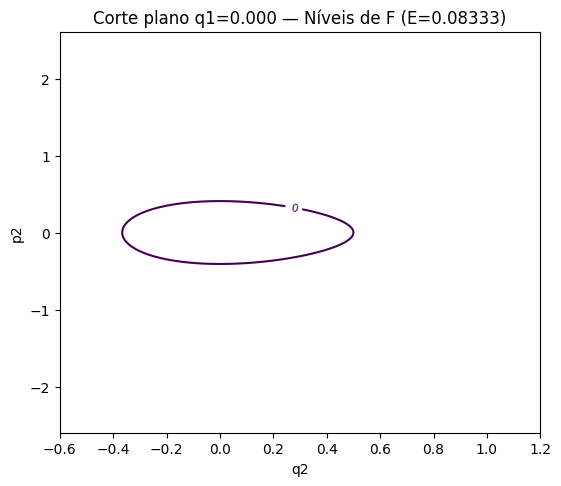

In [3]:
# --- Ajuste a energia aqui ---
E = 0.08333

# 3D: casca F≈0 + pontos internos F>0 + plano q1=0
plot_energy_projection(E=E, N=38, eps=2e-3, vol_frac=0.01, elev=24, azim=-62)

# Corte plano (para 'ver por dentro'): q1 = 0 (a seção do Poincaré)
plot_slice_q1_const(E=E, q1c=0.0, Nq2=500, Np2=500, levels=(0,))
